In [1]:
import fasttext

In [4]:
import pandas as pd
pd.set_option('display.max_colwidth', 0)
df = pd.read_csv('df_not_english_only.csv')

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import fasttext
import optuna

# Define objective function for Optuna
def objective(trial):
    # Define hyperparameters to tune
    lr = trial.suggest_float("lr", 0.01, 1.0)
    epoch = trial.suggest_int("epoch", 5, 50)
    wordNgrams = trial.suggest_int("wordNgrams", 1, 5)

    # Train the FastText model with the suggested hyperparameters
    model = fasttext.train_supervised(input='train.txt', lr=lr, epoch=epoch, wordNgrams=wordNgrams, verbose=-1)

    # Predict labels for the test data
    predicted_labels = [model.predict(text)[0][0] for text in texts]

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)
    
    return accuracy

# Read data and preprocess it
formatted_data = []
for index, row in df.iterrows():
    label = '__label__' + str(row['political_leaning'])
    words = [word.strip("'") for word in row['tokenized_post'][1:-1].split(", ")]
    text = ' '.join(words)
    formatted_data.append(label + ' ' + text)

# Split the data into training and testing sets
train_data, test_data = train_test_split(formatted_data, test_size=0.2, random_state=42)

# Write the formatted data to text files
with open('train.txt', 'w', encoding='utf-8') as f:
    f.write('\n'.join(train_data))

with open('test.txt', 'w', encoding='utf-8') as f:
    f.write('\n'.join(test_data))

# Extract the true labels and texts from test data
true_labels = [label.split()[0] for label in test_data]
texts = [' '.join(label.split()[1:]) for label in test_data]

# Define Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

# Get the best hyperparameters
best_lr = study.best_params["lr"]
best_epoch = study.best_params["epoch"]
best_wordNgrams = study.best_params["wordNgrams"]

# Train the FastText model with the best hyperparameters
best_model = fasttext.train_supervised(input='train.txt', lr=best_lr, epoch=best_epoch, wordNgrams=best_wordNgrams, verbose=-1)

# Predict labels for the test data using the best model
predicted_labels = [best_model.predict(text)[0][0] for text in texts]

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Generate classification report
report = classification_report(true_labels, predicted_labels, digits = 4)

print("Best hyperparameters:", study.best_params)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


c:\Users\benwi\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-05-14 13:13:05,671] A new study created in memory with name: no-name-c03cfd2b-79c4-4272-8264-5f9cbfa8042e
[I 2024-05-14 13:17:53,957] Trial 0 finished with value: 0.8448329690914768 and parameters: {'lr': 0.7421880154546796, 'epoch': 33, 'wordNgrams': 3}. Best is trial 0 with value: 0.8448329690914768.
[I 2024-05-14 13:20:32,737] Trial 1 finished with value: 0.8543552919138307 and parameters: {'lr': 0.7038231137511198, 'epoch': 27, 'wordNgrams': 2}. Best is trial 1 with value: 0.8543552919138307.
[I 2024-05-14 13:26:28,841] Trial 2 finished with value: 0.8246955978769903 and parameters: {'lr': 0.18172678047110244, 'epoch': 24, 'wordNgrams': 5}. Best is trial 1 with value: 0.8543552919138307.
[I 2024-05-14

Best hyperparameters: {'lr': 0.6125906991210739, 'epoch': 34, 'wordNgrams': 2}
Accuracy: 0.853106462691227
Classification Report:
                 precision    recall  f1-score   support

 __label__left     0.8549    0.8255    0.8399      2991
__label__right     0.8516    0.8773    0.8643      3415

      accuracy                         0.8531      6406
     macro avg     0.8533    0.8514    0.8521      6406
  weighted avg     0.8532    0.8531    0.8529      6406



In [3]:
import pickle

# Save the best parameters to a file using pickle
with open('best_params_fastText.pkl', 'wb') as f:
    pickle.dump(study.best_params, f)

In [42]:
import pickle

# Load the best parameters from the saved file
with open('best_params_fastText.pkl', 'rb') as f:
    fastText_best_params = pickle.load(f)


In [43]:
fastText_best_params

{'lr': 0.6125906991210739, 'epoch': 34, 'wordNgrams': 2}

In [11]:
# Get the best hyperparameters

# Load data from train.txt
with open('train.txt', 'r', encoding='utf-8') as train_file:
    train_data = train_file.readlines()

# Load data from test.txt
with open('test.txt', 'r', encoding='utf-8') as test_file:
    test_data = test_file.readlines()


# Extract the true labels and texts from test data
true_labels = [label.split()[0] for label in test_data]
texts = [' '.join(label.split()[1:]) for label in test_data]

best_lr = fastText_best_params["lr"]
best_epoch = fastText_best_params["epoch"]
best_wordNgrams = fastText_best_params["wordNgrams"]

# Train the FastText model with the best hyperparameters
fastText_model = fasttext.train_supervised(input='train.txt', lr=best_lr, epoch=best_epoch, wordNgrams=best_wordNgrams, verbose=-1)

# Predict labels for the test data using the best model
predicted_labels = [fastText_model.predict(text)[0][0] for text in texts]

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Generate classification report
report = classification_report(true_labels, predicted_labels, digits = 4)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8534186699968779
Classification Report:
                 precision    recall  f1-score   support

 __label__left     0.8543    0.8271    0.8405      2991
__label__right     0.8527    0.8764    0.8644      3415

      accuracy                         0.8534      6406
     macro avg     0.8535    0.8518    0.8525      6406
  weighted avg     0.8534    0.8534    0.8532      6406



In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import fasttext
import optuna


# Read data and preprocess it
formatted_data = []
for index, row in df.iterrows():
    label = '__label__' + str(row['political_leaning'])
    words = [word.strip("'") for word in row['tokenized_post'][1:-1].split(", ")]
    text = ' '.join(words)
    formatted_data.append(label + ' ' + text)

# Split the data into training and testing sets
train_data, test_data = train_test_split(formatted_data, test_size=0.2, random_state=42)

# Write the formatted data to text files
with open('train.txt', 'w', encoding='utf-8') as f:
    f.write('\n'.join(train_data))

with open('test.txt', 'w', encoding='utf-8') as f:
    f.write('\n'.join(test_data))

# Extract the true labels and texts from test data
true_labels = [label.split()[0] for label in test_data]
texts = [' '.join(label.split()[1:]) for label in test_data]

c:\Users\benwi\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Define the number of folds
n_splits = 5

# Initialize lists to store accuracy and classification reports for each fold
accuracies = []
classification_reports = []

# Define the FastText parameters
best_lr = fastText_best_params["lr"]
best_epoch = fastText_best_params["epoch"]
best_wordNgrams = fastText_best_params["wordNgrams"]

# Perform 5-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
for train_index, val_index in kf.split(texts):
    # Split data into training and validation sets
    X_train, X_val = np.array(texts)[train_index], np.array(texts)[val_index]
    y_train, y_val = np.array(true_labels)[train_index], np.array(true_labels)[val_index]
    
    # Train the FastText model with the best hyperparameters
    fastText_model = fasttext.train_supervised(input='train.txt', lr=best_lr, 
                                               epoch=best_epoch, wordNgrams=best_wordNgrams, verbose=-1)
    
    # Predict labels for the validation set
    predicted_labels = [fastText_model.predict(text)[0][0] for text in X_val]

    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_val, predicted_labels)
    accuracies.append(accuracy)

    # Generate classification report for this fold
    report = classification_report(y_val, predicted_labels, digits=4)
    classification_reports.append(report)

# Calculate average accuracy
avg_accuracy = np.mean(accuracies)
print("Average Accuracy:", avg_accuracy)

# Generate aggregated classification report
print("Aggregated Classification Report:")
for idx, report in enumerate(classification_reports):
    print(f"Fold {idx+1}:\n{report}\n")


Average Accuracy: 0.8534167315170359
Aggregated Classification Report:
Fold 1:
                precision    recall  f1-score   support

 __label__left     0.8754    0.8414    0.8581       618
__label__right     0.8576    0.8886    0.8728       664

      accuracy                         0.8658      1282
     macro avg     0.8665    0.8650    0.8654      1282
  weighted avg     0.8662    0.8658    0.8657      1282


Fold 2:
                precision    recall  f1-score   support

 __label__left     0.8536    0.8134    0.8330       595
__label__right     0.8445    0.8790    0.8614       686

      accuracy                         0.8486      1281
     macro avg     0.8491    0.8462    0.8472      1281
  weighted avg     0.8488    0.8486    0.8482      1281


Fold 3:
                precision    recall  f1-score   support

 __label__left     0.8463    0.8478    0.8470       578
__label__right     0.8746    0.8734    0.8740       703

      accuracy                         0.8618      1281

In [8]:
accuracies

[0.8658346333853354,
 0.8485558157689306,
 0.8618266978922716,
 0.8579234972677595,
 0.8329430132708822]

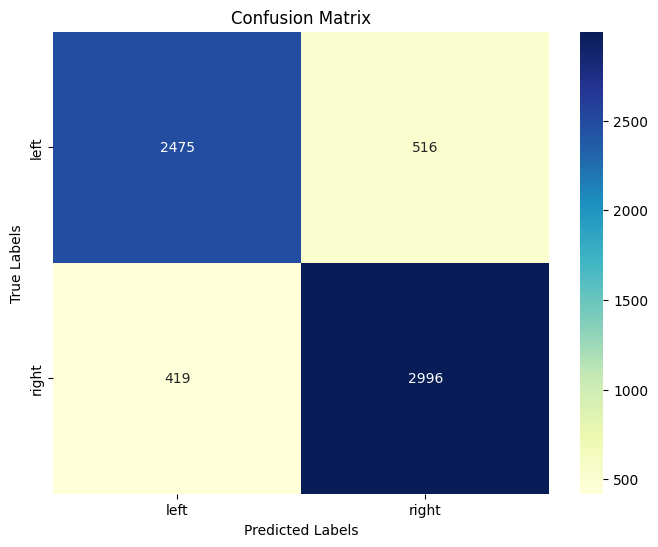

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
fastTextcm = confusion_matrix(true_labels, predicted_labels)

# Define class labels
classes = ['left', 'right']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(fastTextcm, annot=True, cmap='YlGnBu', fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.8551358101779581
Classification Report:
               precision    recall  f1-score   support

           0     0.8566    0.8285    0.8423      2991
           1     0.8540    0.8785    0.8661      3415

    accuracy                         0.8551      6406
   macro avg     0.8553    0.8535    0.8542      6406
weighted avg     0.8552    0.8551    0.8550      6406



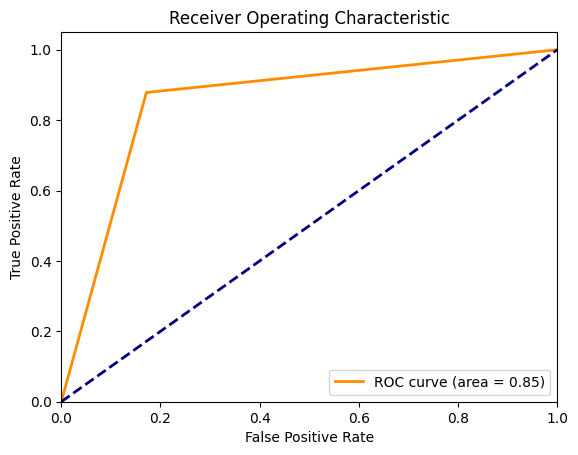

In [30]:
import fasttext
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report

# Assuming fastText_best_params, 'train.txt', texts, and true_labels are already defined

# Load data from train.txt
with open('train.txt', 'r', encoding='utf-8') as train_file:
    train_data = train_file.readlines()

# Load data from test.txt
with open('test.txt', 'r', encoding='utf-8') as test_file:
    test_data = test_file.readlines()

# Extract the true labels from test data
true_labels = [label.strip().split(' ', 1)[0] for label in test_data]

# Convert true labels to binary format
binary_labels = [1 if label == '__label__right' else 0 for label in true_labels]

# Extract the texts from test data
texts = [' '.join(label.split()[1:]) for label in test_data]

# Get the best hyperparameters
best_lr = fastText_best_params["lr"]
best_epoch = fastText_best_params["epoch"]
best_wordNgrams = fastText_best_params["wordNgrams"]

# Train the FastText model with the best hyperparameters
fastText_model = fasttext.train_supervised(input='train.txt', lr=best_lr, epoch=best_epoch, wordNgrams=best_wordNgrams, verbose=-1)

# Predict labels for the test data using the best model and get probabilities
predicted_labels = [fastText_model.predict(text)[0][0] for text in texts]
predicted_probs = [fastText_model.predict(text)[1][0] for text in texts]

# Convert predicted labels to binary format
binary_preds = [1 if label == '__label__right' else 0 for label in predicted_labels]

# Calculate accuracy
accuracy = accuracy_score(binary_labels, binary_preds)

# Generate classification report
report = classification_report(binary_labels, binary_preds, digits=4)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Compute ROC curve and ROC area
fasttext_fpr, fasttext_tpr, threshold = roc_curve(binary_labels, binary_preds)
fasttext_roc_auc = auc(fasttext_fpr, fasttext_tpr)

# Plotting ROC curve
plt.figure()
plt.plot(fasttext_fpr, fasttext_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % fasttext_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [41]:

# print(binary_preds)
print(binary_labels)
print(binary_preds)
print(predicted_probs)



[1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 

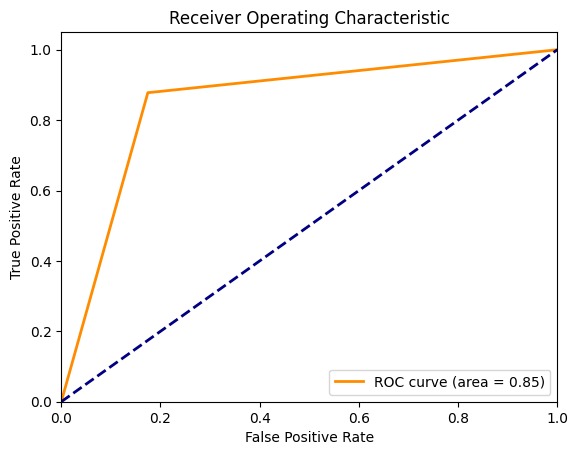

In [28]:
# Compute ROC curve and ROC area
fasttext_fpr, fasttext_tpr, threshold = roc_curve(binary_labels, binary_preds)
fasttext_roc_auc = auc(fasttext_fpr, fasttext_tpr)

# Plotting ROC curve
plt.figure()
plt.plot(fasttext_fpr, fasttext_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % fasttext_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()